In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib as mpl
import nilearn
import seaborn as sb
from nilearn.image import iter_img,load_img


In [2]:
from nilearn import datasets
data=[]
haxby_dataset=datasets.fetch_haxby(n_subjects=6)

print('first sub func image at %s' %(haxby_dataset.func[0]))

first sub func image at /home/strange_lorenz/nilearn_data/haxby2001/subj1/bold.nii.gz


/home/strange_lorenz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: The parameter 'n_subjects' is deprecated from 0.2.6 and will be removed in nilearn next release. Use parameter 'subjects' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:

mask_img = load_img("Documents/Projects/inProgress/R01_predata/StriatumMask_atlas.nii")

In [4]:
from nilearn.decomposition import CanICA

canica = CanICA(mask_img, n_components=5, smoothing_fwhm=None,
                memory="nilearn_cache", memory_level=2,
                threshold=None, verbose=10, random_state=0)
canica.fit(haxby_dataset.func)

# Retrieve the independent components in brain space. Directly
# accesible through attribute `components_img_`. Note that this
# attribute is implemented from version 0.4.1. For older versions,
# see note section above for details.
components_img = canica.components_img_
# components_img is a Nifti Image object, and can be saved to a file with
# the following line:
components_img.to_filename('canica_resting_state.nii.gz')
    

[MultiNiftiMasker.fit] Loading data from None
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[Memory]    0.0s, 0.0min: Loading randomized_svd from nilearn_cache/joblib/sklearn/utils/extmath/randomized_svd/ae1333ac169073c0dfb55e7f9d95813c
______________________________________randomized_svd cache loaded - 0.0s, 0.0min
[Memory]    0.3s, 0.0min: Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/fb8e56705dd92c877288e7667620430a
_____________________________________________fastica cache loaded - 0.0s, 0.0min
[Memory]    0.3s, 0.0min: Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/38198606dfcab4a4ae4d4911c29cc4d9
_____________________________________________fastica cache loaded - 0.0s, 0.0min
[Memory]    0.3s, 0.0min: Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/35ad13b4dbbe299f4febfc433b917b34
_____________________________________________fastica cache loaded - 0.0s, 0.0mi

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


/home/strange_lorenz/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


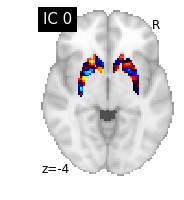

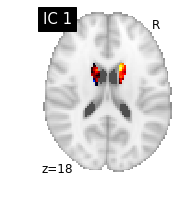

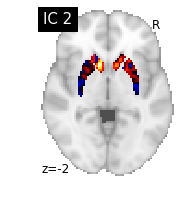

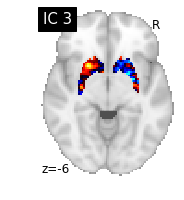

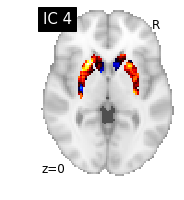

In [5]:

from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

show()

In [19]:
from nilearn.input_data import NiftiMasker
mask=NiftiMasker(mask_img)
#masked_data = apply_mask(haxby_dataset.func[1], mask_img)
B1=mask.fit(haxby_dataset.func[0])

